<a href="https://colab.research.google.com/github/factwy/Study_ML/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression
### 공부 시간에 따른 시험 점수


In [5]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PythonMLWorkspace/ScikitLearn/LinearRegressionData.csv')

In [8]:
dataset.head() # dataset 상위 5개의 데이터

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [11]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [12]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [15]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

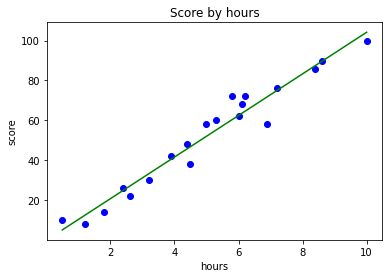

In [17]:
plt.scatter(X, y, color = 'blue') # 산점도 그래프
plt.plot(X, y_pred, color = 'Green') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [20]:
print("9시간 공부했을 때 예상 점수 : ", reg.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [21]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [22]:
reg.intercept_ # Y 절편 (b)

-0.218484702867201

###데이터 세트 분리

In [23]:
from matplotlib import pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PythonMLWorkspace/ScikitLearn/LinearRegressionData.csv')

In [29]:
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 훈련 80 : 테스트 20 으로 분리

In [28]:
X, len(X) # 전체 데이터, X의 개수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]), 20)

In [30]:
X_train, len(X_train) # 훈련 세트 X, 개수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]), 16)

In [31]:
X_test, len(X_test) # 테스트 세트 X, 개수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]), 4)

In [32]:
y, len(y) # 전체 데이터 y

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]), 20)

In [33]:
y_train, len(y_train) # 훈련 세트 y

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [34]:
y_test, len(y_test) # 테스트 세트 y

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [36]:
reg.fit(X_train, y_train) # 훈련 세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

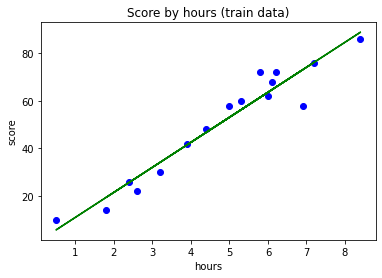

In [38]:
plt.scatter(X_train, y_train, color = 'blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color = 'Green') # 선 그래프
plt.title('Score by hours (train data)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

### 데이터 시각화 (테스트 세트)

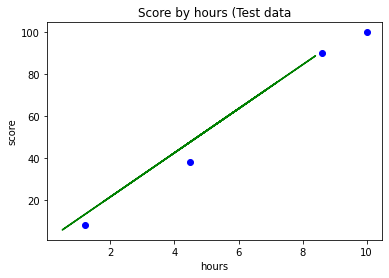

In [40]:
plt.scatter(X_test, y_test, color = 'blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color = 'Green') # 선 그래프
plt.title('Score by hours (Test data') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [41]:
reg.coef_

array([10.49161294])

In [42]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [44]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [45]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)
eta0 : 학습률 (learning rate)

In [65]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent 확률적 경사 하강법
sr = SGDRegressor(max_iter = 1000, eta0 = 1e-3, random_state = 0)
sr.fit(X_train, y_train)

SGDRegressor(eta0=0.001, random_state=0)

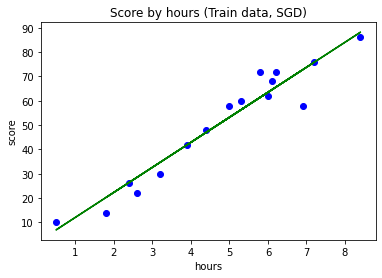

In [66]:
plt.scatter(X_train, y_train, color = 'blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color = 'Green') # 선 그래프
plt.title('Score by hours (Train data, SGD)') # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # Y 축 이름
plt.show()

In [52]:
sr.coef_, sr.intercept_

(array([10.41278572]), array([1.46102611]))

In [54]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9693510286061021

In [55]:
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9351789117142268